In [334]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np


In [335]:
df = pd.read_csv("train.csv")

In [336]:
def dfcleaner(dataframe):
    dataframe["Cabin"] = dataframe["Cabin"].fillna("0/999999/0")
    dataframe = dataframe.fillna(0)
    
    dataframe["Cabinnumber"] = dataframe["Cabin"].str.extract("\/(\w*)\/").astype("int32")
    dataframe["Cabindeck"] = dataframe["Cabin"].str.extract("^(\w*)\/")
    dataframe["Cabinside"] = dataframe["Cabin"].str.extract("\/(\w*)$")

    dataframe["Totalbill"] = dataframe["RoomService"] + dataframe["FoodCourt"] + dataframe["ShoppingMall"] + dataframe["Spa"] + dataframe["VRDeck"]

    #dataframe["Group"] = dataframe["PassengerId"].str.extract("^(\d{4})")
    #filter = dataframe["Group"].value_counts().to_frame().reset_index()
    #filter.columns = ["Group", "Freq"]
    #filter = filter[filter["Freq"] < 5]
    #dataframe.loc[dataframe["Group"].isin(filter["Group"]), "Group"] = 0

    #dataframe = pd.get_dummies(dataframe, columns = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabindeck", "Cabinside", "Group"], drop_first = True)
    dataframe = pd.get_dummies(dataframe, columns = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabindeck", "Cabinside"], drop_first = True)
    
    
    dataframe.loc[dataframe["Cabinnumber"] == 999999, "Cabinnumber"] = 0

    return dataframe

In [337]:
df = dfcleaner(df)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Cabin                      8693 non-null   object 
 2   Age                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Name                       8693 non-null   object 
 9   Transported                8693 non-null   bool   
 10  Cabinnumber                8693 non-null   int32  
 11  Totalbill                  8693 non-null   float64
 12  HomePlanet_Earth           8693 non-null   uint8  
 13  HomePlanet_Europa          8693 non-null   uint8

In [309]:
df = df.drop(["PassengerId", "Cabin", "Name"], axis = 1)

In [310]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabinnumber,Totalbill,HomePlanet_Earth,...,Cabindeck_A,Cabindeck_B,Cabindeck_C,Cabindeck_D,Cabindeck_E,Cabindeck_F,Cabindeck_G,Cabindeck_T,Cabinside_P,Cabinside_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,736.0,1,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,10383.0,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,5176.0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,1091.0,1,...,0,0,0,0,0,1,0,0,0,1


In [311]:
X, y = df.drop(["Transported"], axis = 1).values, df["Transported"].values
y = (y * 1).astype(np.int8)

In [312]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.60, random_state = 42)

X_train.shape, X_val.shape, X_test.shape

((6085, 26), (1043, 26), (1565, 26))

In [319]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [326]:
from evolutionary_algos import EvoMLPClassifier

classifier = EvoMLPClassifier(n = 48, hidden_layers = [16], activation = "leaky_relu", random_state = 42, lr_target = 0.03, lr_final_decay = 0.02)

classifier.fit(scaled_X_train, y_train, epochs = 290, validation_data = (scaled_X_val, y_val), verbose = 1)

Epoch 0 - loss: 0.33686116710367264 - val_loss: 0.3537228216955669
Epoch 3 - loss: 0.334894328177633 - val_loss: 0.3652448352103703
Epoch 4 - loss: 0.30594866789325414 - val_loss: 0.3080187165175691
Epoch 5 - loss: 0.2907391416729492 - val_loss: 0.30990712295806633
Epoch 6 - loss: 0.2829127872271595 - val_loss: 0.29970872572521956
Epoch 7 - loss: 0.28116414047852584 - val_loss: 0.295307413390512
Epoch 8 - loss: 0.27640609304913316 - val_loss: 0.2933045338402745
Epoch 9 - loss: 0.2744771939194692 - val_loss: 0.2918337596706917
Epoch 10 - loss: 0.2729298949406245 - val_loss: 0.28838219305269364
Epoch 11 - loss: 0.26959633021844814 - val_loss: 0.2853581372327058
Epoch 12 - loss: 0.26630776473787227 - val_loss: 0.2859481504111771
Epoch 14 - loss: 0.26533992596642725 - val_loss: 0.2841690067304501
Epoch 15 - loss: 0.2637470717952883 - val_loss: 0.28280596622974213
Epoch 16 - loss: 0.26153351043402817 - val_loss: 0.28188731904852327
Epoch 17 - loss: 0.2608772243380471 - val_loss: 0.281763969

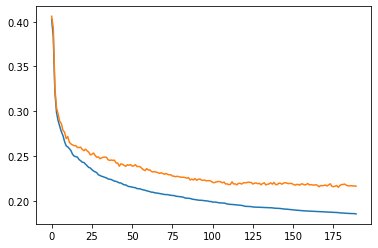

In [324]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(classifier.training_loss_history)
ax.plot(classifier.validation_loss_history)
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       764
           1       0.78      0.83      0.81       801

    accuracy                           0.79      1565
   macro avg       0.80      0.79      0.79      1565
weighted avg       0.80      0.79      0.79      1565



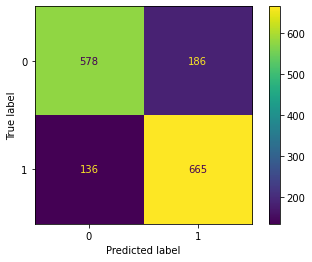

In [325]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
y_pred = classifier.predict(scaled_X_test)
y_pred = ((y_pred > 0.5) * 1).astype(np.int8)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [283]:
scaled_X_final = scaler.transform(X)


In [285]:
classifier = EvoMLPClassifier(n = 48, hidden_layers = [12], activation = "leaky_relu", random_state = 42, lr_target = 0.03, lr_final_decay = 0.02)

classifier.fit(scaled_X_final, y, epochs = 1290, verbose = 1)

Epoch 0 - loss: 0.404057765615523 - 1.0427845021317328
Epoch 1 - loss: 0.3845514198709283 - 0.9080558357280912
Epoch 2 - loss: 0.3610323037691638 - 0.7914748223367739
Epoch 3 - loss: 0.3275409857219969 - 0.6905967355083162
Epoch 4 - loss: 0.3269176657544715 - 0.6033061856675765
Epoch 5 - loss: 0.3122670581817231 - 0.5277727540959274
Epoch 6 - loss: 0.2836393326348197 - 0.46241260360081216
Epoch 7 - loss: 0.2721660678157058 - 0.4058552607341058
Epoch 8 - loss: 0.26205472431804433 - 0.35691487288349055
Epoch 9 - loss: 0.26031534052941985 - 0.3145653374124704
Epoch 10 - loss: 0.2528442827760793 - 0.27791878123303715
Epoch 11 - loss: 0.24679134596940458 - 0.24620693946354963
Epoch 12 - loss: 0.2435675153108197 - 0.21876504262683516
Epoch 13 - loss: 0.24096852435596836 - 0.1950178744550835
Epoch 14 - loss: 0.23763266955883186 - 0.17446770789218613
Epoch 15 - loss: 0.2370989414045388 - 0.15668386627557107
Epoch 16 - loss: 0.2348404198384426 - 0.1412936907644339
Epoch 17 - loss: 0.23210561829

In [288]:
df_test = pd.read_csv("test.csv")
df_pid = df_test.loc[:, "PassengerId"]
df_test = dfcleaner(df_test)
df_test = df_test.drop(["PassengerId", "Cabin", "Name"], axis = 1)
#df_test.info()

In [289]:
X_test_final = df_test.values

scaled_X_test_final = scaler.transform(X_test_final)

In [290]:
y_pred = classifier.predict(scaled_X_test_final)

y_pred = (y_pred > 0.2)
y_pred.sum()

2240

In [291]:
df_test = df_pid.to_frame()
df_test["Transported"] = y_pred
df_test[:10]

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


In [293]:
df_test.to_csv("try_2.csv", index = False)